In [10]:
import os
import pickle
import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


COLOR = 'k'
plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['xtick.major.size']  = 10 #12
plt.rcParams['ytick.major.size']  = 10 #12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 6
plt.rcParams['ytick.minor.size']  = 6

plt.rcParams['axes.linewidth'] = 3

plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'

parula=np.load('/Users/belugawhale/parula_colors.npy', allow_pickle=True)

In [50]:
line_table = Table.read('/Users/belugawhale/Documents/AUMic/aumic_linelist.csv',
                        format='csv', comment='#')
line_table = line_table[line_table['X-ray']==0]

dict_path = '/Users/belugawhale/Documents/AUMic/final_dem_fits/hdl_full'
qdict = pd.read_pickle(os.path.join(dict_path, r'aumic_linelist_q.pkl'))
fdict = pd.read_pickle(os.path.join(dict_path, r'aumic_linelist_f.pkl'))

In [45]:
actual_keys = np.zeros(len(line_table), dtype='U10')
for i in range(len(line_table)):
    actual_keys[i] = ''.join(line_table['Ion'][i].split(' '))

Text(0, 0.5, '(F$_{Flare\\,B}$ - F$_Q$)/F$_Q$ [%]')

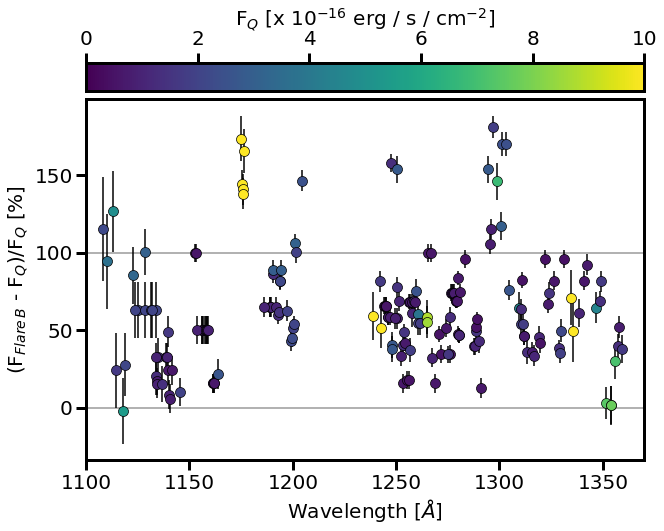

In [51]:
tab = Table(names=['\colhead{Ion}','\colhead{$\lambda_\textrm{rest}$ [\AA]}',
                   '\colhead{$\lambda_\textrm{obs}$ [\AA]}','\colhead{Velocity Shift [km s$^{-1}$]}',
                   '\colhead{Flux (Quiescent)}','\colhead{FWHM (Quiescent)}',
                   '\colhead{Flux (Flare B)}','\colhead{FWHM (Flare B)}'],
           dtype=['U10', np.float64, np.float64, np.float64, 'U20', 'U20', 'U20', 'U20'])

scale = 1e-15
qlines, flines = np.array([]), np.array([])
x=0
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor('w')
for i in range(len(line_table)):
    k = ''.join(line_table['Ion'][i].split(' '))
    wo = line_table[i]['wave_obs']+0.0
    try:
        if k != 'HeII' and k!='NII' and k!='OI':
            closest = np.argmin(np.abs(wo-qdict[k]['centers']))
            fq = qdict[k]['Fline'][closest]
            fqe= qdict[k]['FlineErr'][closest]

            ff = fdict[k]['Fline'][closest]
            ffe= fdict[k]['FlineErr'][closest]

            plt.errorbar(wo, (ff-fq)/fq*100, c=COLOR,
                         yerr=np.sqrt(ffe**2+fqe**2)/1e-16,
                         marker='o',zorder=10)
            im = plt.scatter(wo, (ff-fq)/fq*100, 
                            c=fq/1e-15, zorder=100,
                            marker='o', cmap='viridis',
                            vmin=0, vmax=10, s=100,
                            edgecolor='k', lw=0.7)
            
            qlines = np.append(qlines, fq)
            flines = np.append(flines, ff)
            x += 1

    except:
        pass

plt.plot(np.linspace(1000,1400,10), np.full(10, 0), 
         color='k', lw=2, zorder=0, alpha=0.3)
plt.plot(np.linspace(1000,1400,10), np.full(10, 100),
         color='k', lw=2, zorder=0, alpha=0.3)


plt.colorbar(im, orientation="horizontal", pad=0.02,  location='top',
             label='F$_Q$ [x $10^{-16}$ erg / s / cm$^{-2}$]')

plt.xlim(1100,1370)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('(F$_{Flare\,B}$ - F$_Q$)/F$_Q$ [%]')

#plt.savefig('/Users/belugawhale/Documents/AUMic/paper/table3_rework.pdf',
#            rasterize=300, dpi=300, bbox_inches='tight')
#plt.savefig('/Users/belugawhale/Desktop/table3_rework.png',
#            rasterize=300, dpi=300, bbox_inches='tight')
#plt.savefig('/Users/belugawhale/Documents/GitHub/presentation-figures/aumic-flares/light-bkg/table3.png',
#            rasterize=300, dpi=300, bbox_inches='tight', transparent=True)

In [63]:
oldtab = '/Users/belugawhale/Documents/GitHub/cos_flares/data'
oldtab = Table.read(os.path.join(oldtab, 'ion_list.txt'), format='csv', delimiter='&')

In [81]:
oldtab.colnames

['Ion',
 '$\\lambda_\\textrm{rest}$',
 '$\\lambda_\\textrm{obs}$',
 'Velocity Shift',
 'Flux (Quiescent)',
 'FWHM (Quiescent)',
 'Flux (Flare B)',
 'FWHM (Flare B)']

In [88]:
goodrows = np.array([], dtype=int)

for i in range(len(line_table)):
    k = ''.join(line_table['Ion'][i].split(' '))
    wo = line_table[i]['wave_obs']
    

    if k != 'HeII' and k!='OI' and k != 'H2':

        closest = np.where(np.abs(wo-qdict[k]['centers'])<0.2)[0]
        
        if len(closest) > 0:
            closest2 = np.where(np.abs(wo - oldtab['$\\lambda_\\textrm{obs}$'])<0.05)[0]
            goodrows = np.append(goodrows, closest2)

In [97]:
oldtab[goodrows].write('../data/ion_list_fixed.txt', format='latex', overwrite=True)